In [3]:
from dataprep import *
import pandas as pd
import numpy as np


In [2]:
## Process data and create initial dataFrame
cgm_data = DataCleaning()

In [3]:
## Only run the below if you want to rebuild your data file - due to the size of the source this can take up to an hour to run
#cgm_data.resequenceData(size=3)

Warning - This function will take a while to complete as it is creating sequences based on multiple variables in the data file. Please be patient.


## EDA for Project Section

In [14]:
## load dataframe from cleaned data
CGMDf = pd.read_csv('/Users/bsw/Documents/MRPLocal/DATA/CGM_Processed.csv')
CGMDf.head()

Unnamed: 0.1                   int64
index                          int64
Unnamed: 0                     int64
RecID                          int64
PtID                           int64
ParentCITYDeviceUploadsID      int64
DeviceDtTm                    object
RecordType                    object
Value                        float64
Units                         object
SortOrd                      float64
ValueMMOL                    float64
DDate                         object
hourOfDay                      int64
series                          bool
series_id                      int64
dtype: object

### Cleaning up data for simplicity

In [15]:

## drop unnecessary columns to save on space / compute
CGMDf.drop(['Unnamed: 0.1','index','Unnamed: 0','RecordType','Value'], inplace=True, axis=1)

## cleaning up the data
CGMDf['DDate']=pd.to_datetime(CGMDf['DDate'])
CGMDf['DeviceDtTm']=pd.to_datetime(CGMDf['DeviceDtTm'])
CGMDf.SortOrd=CGMDf.SortOrd.astype(int)


In [27]:
CGMDf.head()

,RecID,PtID,ParentCITYDeviceUploadsID,DeviceDtTm,Units,SortOrd,ValueMMOL,DDate,hourOfDay,series,series_id
0,1539485,39,651,2000-04-21 04:31:56,mg/dL,7880,7.5,2000-04-21,4,False,73331
1,1539486,39,651,2000-04-21 04:36:55,mg/dL,7881,7.4,2000-04-21,4,False,73331
2,1539487,39,651,2000-04-21 04:41:55,mg/dL,7882,7.4,2000-04-21,4,False,73331
3,1539488,39,651,2000-04-21 04:46:56,mg/dL,7883,7.4,2000-04-21,4,False,73331
4,1539489,39,651,2000-04-21 04:51:56,mg/dL,7884,7.4,2000-04-21,4,False,73331


In [35]:
## total size of sampled file
CGMDf.shape[0]

2073853

In [23]:
CGMDf.dtypes

RecID                                 int64
PtID                                  int64
ParentCITYDeviceUploadsID             int64
DeviceDtTm                   datetime64[ns]
Units                                object
SortOrd                               int64
ValueMMOL                           float64
DDate                        datetime64[ns]
hourOfDay                             int64
series                                 bool
series_id                             int64
dtype: object

In [33]:
## Create a Dictionary of statistics for summary
ptStats = {} ## stat dictionary
ptStats['number_of_people']=CGMDf.groupby(['PtID'])['RecID'].count().shape[0] ## number of people in the file




In [63]:
grpPTandSeries = pd.DataFrame(CGMDf.groupby(['PtID','series_id'])['RecID'].count()) ## number of people in the file
grpPTandSeries[grpPTandSeries['RecID']<=10]

## Remove the sequences less than 10, they will be useless, create stats based on that.

RecID
PtID series_id       
1    75470          6
     75476          9
     75477         10
     75480          6
     75482          1
...               ...
184  108509         4
     108511         1
     108516         2
     108519         2
     108520         2

[13201 rows x 1 columns]

array([[<AxesSubplot:title={'center':'RecID'}>]], dtype=object)

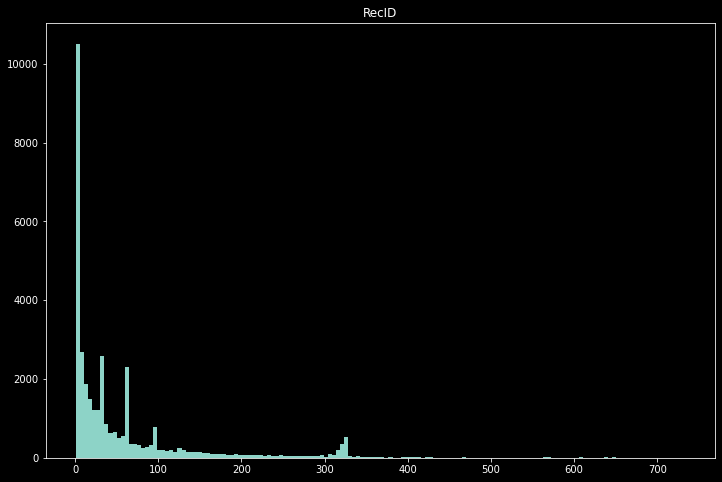

In [62]:
grpPTandSeries[grpPTandSeries['RecID'].between(0,800)].hist(bins=150,figsize=(12,8), grid=False)

In [29]:
CGMDf.groupby(['PtID'])['RecID'].count().max()

#CGMDf.groupby(['PtID','series_id'])['RecID'].count()

58276